# Part 1

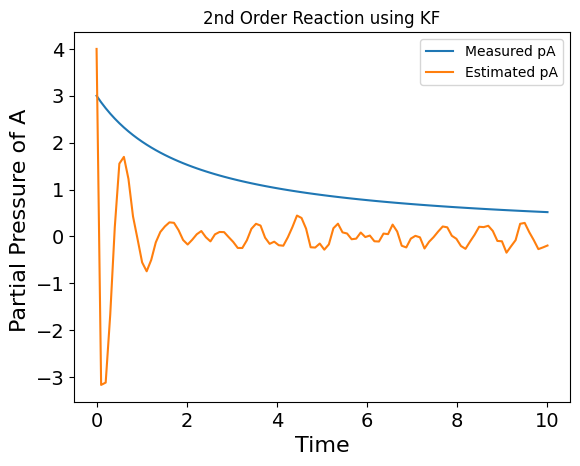

In [1]:
from filterpy.kalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Define the kinetic parameters for the reactor
k = 0.16

# Define the state model for the reactor
def state_model(y, dt):
    return y + dt * (-k * y**2)

# Define the measurement model for the reactor
def measurement_model(y):
    return y + 0.01*(np.random.normal(0,1))

# Set up the initial conditions for the reactor
y0 = np.array([4.0])
P0 = np.array([[1.0]])

# Set up the measurement data
t = np.linspace(0, 10, 100)
z_meas = (3/(1+3*k*t))

# Initialize the KF parameters
dt = 0.1
F = np.array([1 - k*y0**2*dt])
H = np.array([1.0])
Q = np.array([[0.001]])
R = np.array([[0.001]])

kf = KalmanFilter(dim_x=1, dim_z=1)
kf.x = y0
kf.P = P0
kf.F = F
kf.H = H
kf.Q = Q
kf.R = R

# Define the arrays to store the results
y = np.zeros((1, len(t)))
y[:, 0] = y0

# Run the KF
for i in range(1, len(t)):
    # Predict with KF
    kf.predict()

    # Add measurement noise to the estimated Pb
    pb = kf.y + 0.1*(np.random.normal(0,1))

    # Update with KF
    kf.update(pb)

    # Store the result
    y[:, i] = kf.y

# Plot the results
plt.plot(t, z_meas, label='Measured pA')
plt.plot(t, y[0], label='Estimated pA')
plt.title("2nd Order Reaction using KF")
plt.ylabel("Partial Pressure of A ", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
# plt.grid()
plt.show()


# Part 2

(100,)


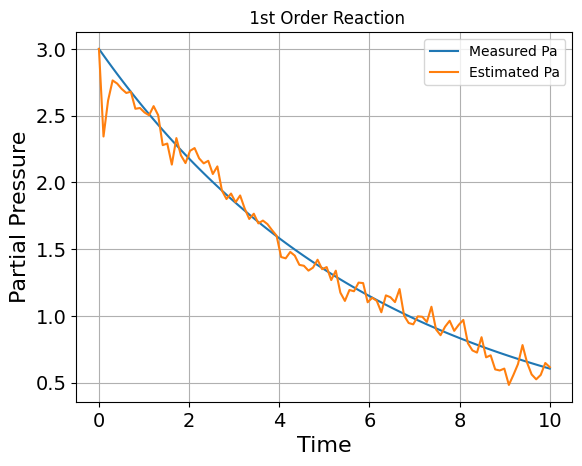

In [21]:
from filterpy.kalman import MerweScaledSigmaPoints, UnscentedKalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Define the kinetic parameters for the reactor
k = 0.16

# Define the state model for the reactor
def state_model(x, dt):
    return x + dt * (-k * x**1)

# Define the measurement model for the reactor
def measurement_model(x):

    return x+0.001*(np.random.normal(0,1))                   #MODIFY

# Set up the initial conditions for the reactor
x0 = np.array([3])                                        #MODIFY
P0 = np.array([[1.0]])

# Set up the measurement data
t = np.linspace(0, 10, 100)
z_meas = 3*np.exp(-k*t)


# Initialize the UKF parameters
points = MerweScaledSigmaPoints(n=1, alpha=0.1, beta=2, kappa=0)
ukf = UnscentedKalmanFilter(dim_x=1, dim_z=1, dt=0.1, points=points, fx=state_model, hx=measurement_model)
ukf.x = x0 +1*(np.random.normal(0,1))                     #MODIFY
ukf.P = P0

# Define the arrays to store the results
x = np.zeros((1, len(t)))
x[:, 0] = x0

# Run the UKF
for i in range(1, len(t)):
    # Predict and update with UKF
    ukf.predict()
    hx = measurement_model(ukf.x)
    y = z_meas[i] - hx
    ukf.update(z_meas[i])

    # Store the result
    x[:, i] = ukf.x
print(z_meas.shape)

#Let total pressure be 500
# Plot the results
# plt.subplot(2, 1, 1)
plt.plot(t, z_meas, label='Measured Pa')
plt.plot(t, x[0], label='Estimated Pa')

plt.title(" 1st Order Reaction")
plt.ylabel("Partial Pressure", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid()




# Part 3

(100,)


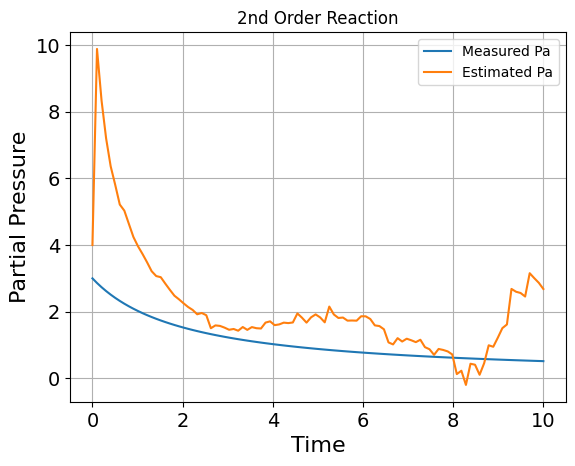

In [13]:
from filterpy.kalman import MerweScaledSigmaPoints, UnscentedKalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Define the kinetic parameters for the reactor
k = 0.16

# Define the state model for the reactor
def state_model(x, dt):
    return x + dt * (-k * x**2)

# Define the measurement model for the reactor
def measurement_model(x):

    return x+10*(np.random.normal(0,1))   #MODIFY

# Set up the initial conditions for the reactor
x0 = np.array([4])       #MODIFY
P0 = np.array([[1.0]])

# Set up the measurement data
t = np.linspace(0, 10, 100)
z_meas = (3/(1+3*k*t))

# Initialize the UKF parameters
points = MerweScaledSigmaPoints(n=1, alpha=0.1, beta=2, kappa=0)
ukf = UnscentedKalmanFilter(dim_x=1, dim_z=1, dt=0.1, points=points, fx=state_model, hx=measurement_model)
ukf.x = x0 +10*(np.random.normal(0,1))    #MODIFY
ukf.P = P0

# Define the arrays to store the results
x = np.zeros((1, len(t)))
x[:, 0] = x0

# Run the UKF
for i in range(1, len(t)):
    # Predict and update with UKF
    ukf.predict()
    hx = measurement_model(ukf.x)
    y = z_meas[i] - hx
    ukf.update(z_meas[i])

    # Store the result
    x[:, i] = ukf.x
print(z_meas.shape)

#Let total pressure be 500
# Plot the results
# plt.subplot(2, 1, 1)
plt.plot(t, z_meas, label='Measured Pa')
plt.plot(t, x[0], label='Estimated Pa')

plt.title("2nd Order Reaction")
plt.ylabel("Partial Pressure", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid()


# Part 4

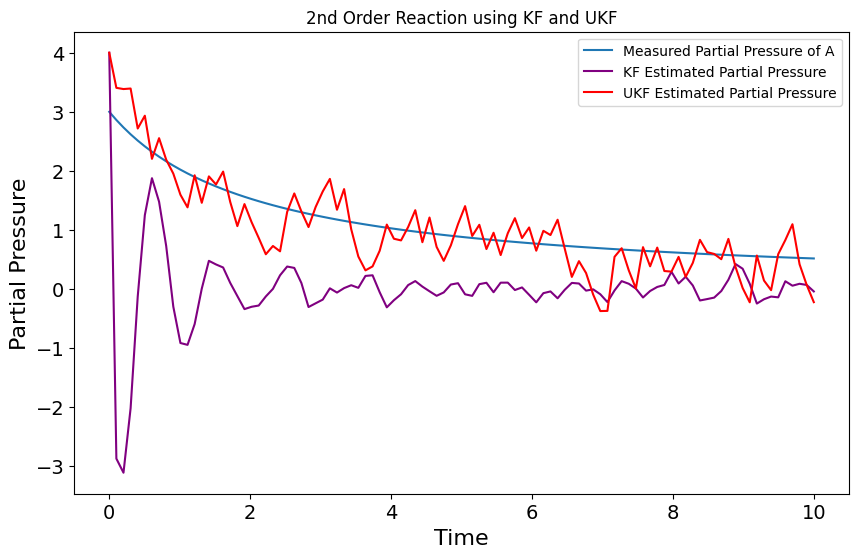

In [3]:
from filterpy.kalman import KalmanFilter, MerweScaledSigmaPoints, UnscentedKalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Define the kinetic parameters for the reactor
k = 0.16

# Define the state model for the reactor
def state_model(y, dt):
    return y + dt * (-k * y**2)

# Define the measurement model for the reactor
def measurement_model(y):
    return y + 0.01*(np.random.normal(0,1))

# Set up the initial conditions for the reactor
y0 = np.array([4.0])
P0 = np.array([[1.0]])

# Set up the measurement data
t = np.linspace(0, 10, 100)
z_meas = (3/(1+3*k*t))

# Initialize the KF parameters
dt = 0.1
F = np.array([1 - k*y0**2*dt])
H = np.array([1.0])
Q = np.array([[0.001]])
R = np.array([[0.001]])

kf = KalmanFilter(dim_x=1, dim_z=1)
kf.x = y0
kf.P = P0
kf.F = F
kf.H = H
kf.Q = Q
kf.R = R

# Define the arrays to store the results
y_kf = np.zeros((1, len(t)))
y_kf[:, 0] = y0

# Run the KF
for i in range(1, len(t)):
    # Predict with KF
    kf.predict()

    # Add measurement noise to the estimated Pb
    pb = kf.y + 0.1*(np.random.normal(0,1))

    # Update with KF
    kf.update(pb)

    # Store the result
    y_kf[:, i] = kf.y

# Initialize the UKF parameters
points = MerweScaledSigmaPoints(n=1, alpha=0.1, beta=2, kappa=0)
ukf = UnscentedKalmanFilter(dim_x=1, dim_z=1, dt=0.1, points=points, fx=state_model, hx=measurement_model)
ukf.x = y0 +0.01*(np.random.normal(0,1))
ukf.P = P0

# Define the arrays to store the results
y_ukf = np.zeros((1, len(t)))
y_ukf[:, 0] = y0

# Run the UKF
for i in range(1, len(t)):
    # Predict and update with UKF
    ukf.predict()
    hx = measurement_model(ukf.x)
    y = z_meas[i] - hx
    ukf.update(z_meas[i])

    # Store the result
    y_ukf[:, i] = ukf.x

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, z_meas, label='Measured Partial Pressure of A')
plt.plot(t, y_kf[0], label='KF Estimated Partial Pressure',color='purple')
plt.plot(t, y_ukf[0], label='UKF Estimated Partial Pressure', color='red')
plt.title("2nd Order Reaction using KF and UKF")
plt.ylabel("Partial Pressure", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
# plt.grid()
plt.show()
